# Movie Industry EDA

## Objective
Investigate the film industry to gain sufficient understanding of what attributes to success and in turn utilize this analysis to create actionable recommendations for industry entry.

In [1]:
# Let's import libraries we may need for our analysis and import the dataframes.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
actors_df = pd.read_csv('Actors_Table.csv')
imdb_base_df = pd.read_csv('IMDb__new_base.csv')
imdb_budgets_df = pd.read_csv('IMDb_budgets.csv')

In [3]:
#First remove any movies that had a $0 domestic gross.
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

Now that we've fixed that, let's preview the head of each dataframe so we know what data we are working with.


In [4]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2.797732e+09
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2.797732e+09
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2.797732e+09
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2.797732e+09
4,Spider-Man: No Way Home,2021,Tom Holland,"Dec 14, 2021",200000000,814108407,1.910042e+09


In [5]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.8,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Spider-Man: No Way Home,2021,8.3,PG-13,148,"Action, Adventure, Fantasy"
3,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
4,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"


In [6]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2.797732e+09
1,Spider-Man: No Way Home,2021,8.3,PG-13,148,"Action, Adventure, Fantasy","Dec 14, 2021",200000000,814108407,1.910042e+09
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,785221649,2.910284e+09
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1.336494e+09
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2.048360e+09


# Question 1: What are the most profitable movies and how much should you spend?


Let's calculate profit and profit margin for each of the movies in `imdb_budgets_df` dataframe and add those as new columns.  

Here, we'll define profit as `Worldwide Gross`-`Production Budget`.

It will also be beneficial in our analysis to have uniformity when discussing movie budgets and profits so we will also create an adjusted budget and adjusted profit column to account for inflation.

We will use the current average inflation rate of  7.3%.

**NOTE:**

1. Profit margin is the measure of your business's profitability.
2. A Budget Adjustment (BA) is used to record both income and expense transaction changes against an existing budget (current budget)
3. Adjusted Profit represents the best estimate of what that true profit is


In [7]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']
imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [8]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.073)+1)*
                                      imdb_budgets_df['Production Budget'])
imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.073)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2.797732e+09,2.397732e+09,0.857027,429200000.0,2.572766e+09
1,Spider-Man: No Way Home,2021,8.3,PG-13,148,"Action, Adventure, Fantasy","Dec 14, 2021",200000000,814108407,1.910042e+09,1.710042e+09,0.895290,185400000.0,1.585209e+09
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,785221649,2.910284e+09,2.673284e+09,0.918565,427311000.0,4.819931e+09
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1.336494e+09,1.136494e+09,0.850355,229200000.0,1.302422e+09
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2.048360e+09,1.748360e+09,0.853541,343800000.0,2.003620e+09


For this question we are specifically looking at profitable movies.  We'll create a separate dataframe called `profitable_movies_df` where the `Profit` column is greater than 0. We will then sort by `Adjusted_Profit` to rank movies in terms of profitability.

In [9]:
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True)
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,5,Titanic,1997,7.9,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2.207987e+09,2.007987e+09,0.909420,535800000.0,5.379396e+09
1,2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,785221649,2.910284e+09,2.673284e+09,0.918565,427311000.0,4.819931e+09
2,17,E.T. the Extra-Terrestrial,1982,7.9,PG,115,"Adventure, Family, Sci-Fi","Jun 11, 1982",10500000,439251124,7.971035e+08,7.866035e+08,0.986827,39627000.0,2.968642e+09
3,28,Jurassic Park,1993,8.2,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1.045573e+09,9.825730e+08,0.939746,187173000.0,2.919224e+09
4,21,The Lion King,1994,8.5,G,88,"Animation, Adventure, Drama","Jun 15, 1994",79300000,421785283,9.861938e+08,9.068938e+08,0.919590,229811400.0,2.628178e+09


Let's take a look at the most successful movies so that we can get a better idea of what the budget should be.

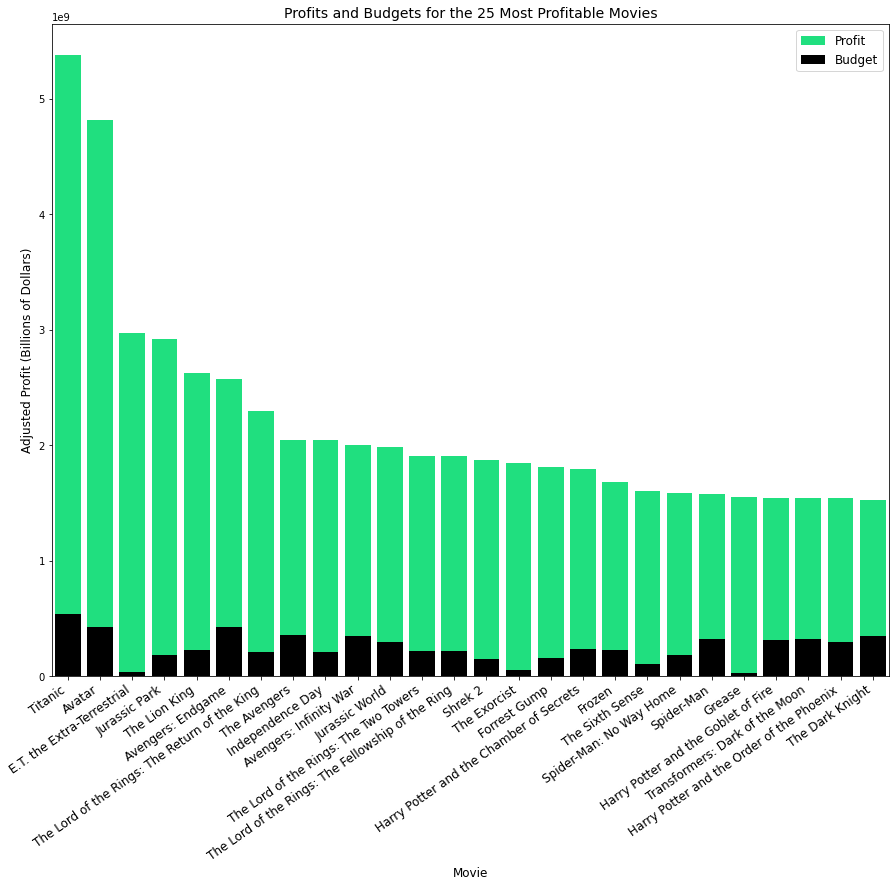

In [10]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'], 
            color='springgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=14)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

In [11]:
profitable_movies_df['Adjusted_Budget'].describe()

count    2.233000e+03
mean     9.584253e+07
std      8.650842e+07
min      4.011000e+06
25%      3.336300e+07
50%      6.504000e+07
75%      1.359900e+08
max      6.280030e+08
Name: Adjusted_Budget, dtype: float64

In [12]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count    2.500000e+01
mean     2.741374e+08
std      1.170605e+08
min      3.962700e+07
25%      1.948200e+08
50%      2.298114e+08
75%      3.470600e+08
max      5.358000e+08
Name: Adjusted_Budget, dtype: float64

In [13]:
profitable_movies_df['Profit_Margin'].describe()

count    2233.000000
mean        0.608353
std         0.230060
min         0.000265
25%         0.462731
50%         0.656094
75%         0.785840
max         0.986827
Name: Profit_Margin, dtype: float64

In [14]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].median()

0.8514949715098415

In [15]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

1592

In [16]:
profitable_movies_df.loc[0:24, 'Production Budget'].median()

200000000.0

In [17]:
profitable_movies_df['Production Budget'].median()

35000000.0

Clearly the most successful 25 movies have both incredible profits and profit margins. Titanic (1997), Avatar, and Jurassic Park  are the most successful movies in terms of sheer profit. 

So how do we know what to spend? We need to think about what sort of profit margin we want to see. 1592 out of 2233 total profitable movies have a profit margin over 50%. That's good news as it indicates that we can be more aggressive in choosing a threshold for the profit margin.

The top 25 movies have a median profit margin of 85.2% with a median budget of \\$200,000,000. When looking at all of our profitable movies, the profit margin drops significantly to 60.8\% and the budget drops significantly to \\$35,000,000. We use the median to describe our data here as the mean will be skewed by outlier data.

Let's filter the data with a profit margin of  75% or greater and a budget greater than $35,000,000.

In [18]:
filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 35000000)]
len(filtered_df)

427

After filtering we still have 427 movies left upon which to draw conclusions.


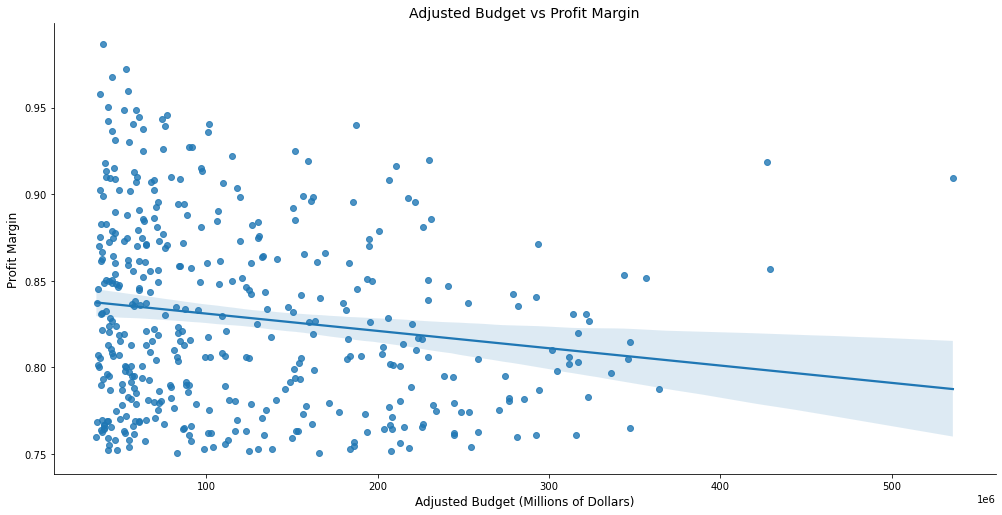

In [19]:
ax2 = sns.lmplot(x='Adjusted_Budget', y='Profit_Margin', data=filtered_df, height=7, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Adjusted Budget vs Profit Margin', fontsize=14)
plt.savefig('BudgetVMargin');

Now that we've got our profitable movie data, let's take a look at adjusted profit versus adjusted budget for each of the movies in the dataframe.

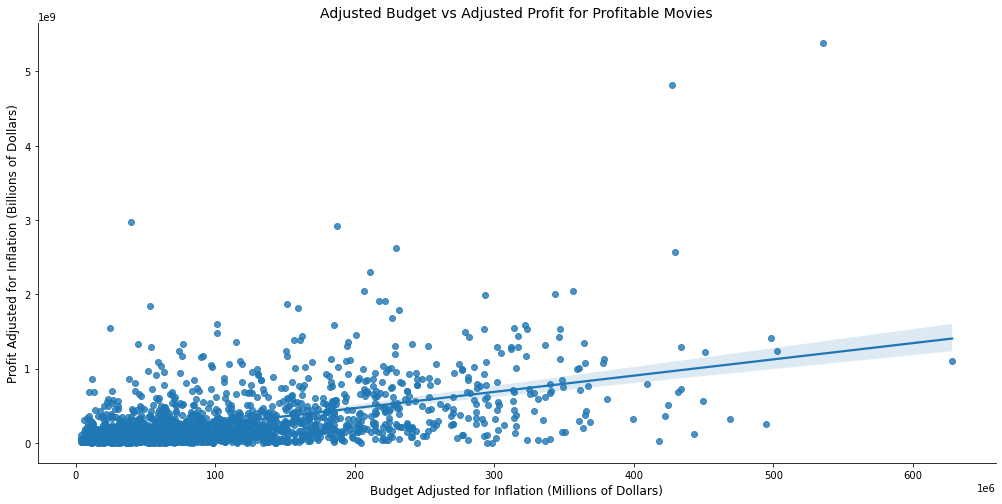

In [20]:
ax1 = sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, height=7, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontsize=14)
plt.savefig('BudgetVProfit');

In [21]:
filtered_df

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,5,Titanic,1997,7.9,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2.207987e+09,2.007987e+09,0.909420,535800000.0,5.379396e+09
1,2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,785221649,2.910284e+09,2.673284e+09,0.918565,427311000.0,4.819931e+09
2,17,E.T. the Extra-Terrestrial,1982,7.9,PG,115,"Adventure, Family, Sci-Fi","Jun 11, 1982",10500000,439251124,7.971035e+08,7.866035e+08,0.986827,39627000.0,2.968642e+09
3,28,Jurassic Park,1993,8.2,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1.045573e+09,9.825730e+08,0.939746,187173000.0,2.919224e+09
4,21,The Lion King,1994,8.5,G,88,"Animation, Adventure, Drama","Jun 15, 1994",79300000,421785283,9.861938e+08,9.068938e+08,0.919590,229811400.0,2.628178e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,937,Last Vegas,2013,6.6,PG-13,105,"Comedy, Drama","Jan 28, 2013",28000000,63914167,1.129142e+08,8.491417e+07,0.752024,42308000.0,1.283053e+08
1057,1077,Clueless,1995,6.9,PG-13,97,"Comedy, Romance","Jul 1, 1995",13700000,56598476,5.795657e+07,4.425657e+07,0.763616,38702500.0,1.250248e+08
1058,1261,Premonition,2007,5.9,PG-13,96,"Drama, Fantasy, Mystery","Mar 16, 2007",20000000,47852604,8.414683e+07,6.414683e+07,0.762320,38980000.0,1.250222e+08
1091,1746,United 93,2006,7.6,R,111,"Action, Drama, History","Apr 28, 2006",18000000,31567134,7.763504e+07,5.963504e+07,0.768146,36396000.0,1.205820e+08


In [22]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,427.000000,427.000000,427.000000,427.000000,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,427.000000,4.270000e+02,4.270000e+02
mean,457.754098,2005.840749,6.920843,115.742389,6.812764e+07,1.749660e+08,4.286756e+08,3.605479e+08,0.828891,1.209172e+08,6.601098e+08
std,416.849128,9.678781,0.963275,21.475374,5.710262e+07,1.298258e+08,3.785459e+08,3.308642e+08,0.054647,8.505951e+07,5.644588e+08
min,0.000000,1964.000000,2.400000,81.000000,8.000000e+06,2.280000e+07,5.795657e+07,4.425657e+07,0.750282,3.580500e+07,1.131470e+08
25%,135.500000,2000.000000,6.350000,99.000000,2.800000e+07,8.455239e+07,1.727039e+08,1.406479e+08,0.781004,5.472750e+07,2.839906e+08
50%,329.000000,2007.000000,7.000000,112.000000,4.700000e+07,1.404647e+08,3.057058e+08,2.529234e+08,0.819549,8.771800e+07,5.031584e+08
75%,671.500000,2013.000000,7.600000,129.000000,8.500000e+07,2.174316e+08,5.872774e+08,4.815296e+08,0.870188,1.651550e+08,8.680392e+08
max,2117.000000,2021.000000,9.000000,201.000000,4.000000e+08,8.583730e+08,2.910284e+09,2.673284e+09,0.986827,5.358000e+08,5.379396e+09


We examine the data in a scatter plot again to see if we can determine trends. Our data is much more spread out when comparing profit margin and budget.  The trend line in this plot is negative which cautions against spending too much money as we may potentially hurt our profit margin.  Looking at the filtered data, we have a median budget of $47,000,000 and a median profit margin of 81.9%.  

**Question 1 Conclusion**: We recommend that Microsoft should budget approximately $47,000,000 to make a movie. This should correlate with a profit margin above 82%. 

# Question 2: Which movie genres are most commonly produced and does quantity equate to higher net profits?


In [23]:
#Create a genre table that separates each value in the genre column in their own rows.
imdb_budgets_df['Genre'] = imdb_budgets_df['Genre'].str.split(', ')
imdb_budgets_df1 = imdb_budgets_df['Genre'].apply(pd.Series)
imdb_budgets_df2 = pd.merge(imdb_budgets_df, imdb_budgets_df1, right_index = True, left_index = True)
imdb_budgets_df3 = imdb_budgets_df2.drop(['Genre'], axis = 1)
genre_budgets_df = imdb_budgets_df3.melt(id_vars=['Movie', 'Year'], value_vars=[0, 1, 2] ,var_name = ['X'])
genre_budgets_df = pd.merge(genre_budgets_df, imdb_budgets_df)
genre_budgets_df = genre_budgets_df.drop(['Genre', 'X'], axis=1)
genre_budgets_df = genre_budgets_df.drop_duplicates()
genre_budgets_df = genre_budgets_df.rename(columns={'value': 'Genre'})
genre_budgets_df = genre_budgets_df.dropna()

In [24]:
#Do a count of all movies grouped by genre.
m_by_genre = genre_budgets_df.groupby('Genre', as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)

In [25]:
m_by_genre

,Genre,Movie
6,Drama,1214
4,Comedy,1078
0,Action,904
1,Adventure,706
5,Crime,503
17,Thriller,447
14,Romance,441
13,Mystery,273
10,Horror,273
15,Sci-Fi,267


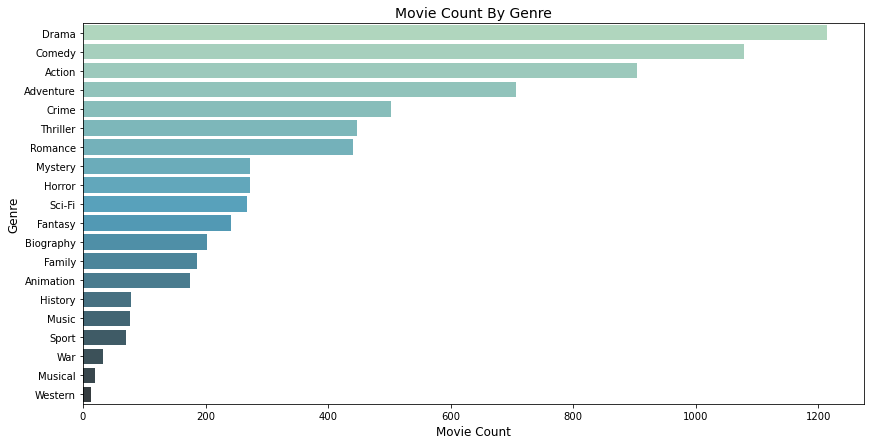

In [26]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=m_by_genre['Movie'], y=m_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14)
plt.savefig('CountGenre');

We can see that Drama ,Action and Comedy dominate the quantity of movie genres but does this necessarily mean these are the most profitable genres? In order to determine this we will once again group each genre but this time we are going to take a look at the average net profit for each.

In [27]:
#Once again group the movies by genre, showing the average net profit and profit margin for each.
p_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)


In [28]:
p_by_genre

,Genre,Adjusted_Profit,Profit_Margin
2,Animation,2.459824e+08,0.665772
1,Adventure,1.907074e+08,0.627402
15,Sci-Fi,1.666293e+08,0.600539
0,Action,1.085614e+08,0.536544
7,Family,9.983423e+07,0.550447
8,Fantasy,9.527575e+07,0.547098
13,Mystery,8.830418e+07,0.662475
12,Musical,8.685126e+07,0.470012
17,Thriller,8.287334e+07,0.596069
10,Horror,8.231718e+07,0.702709


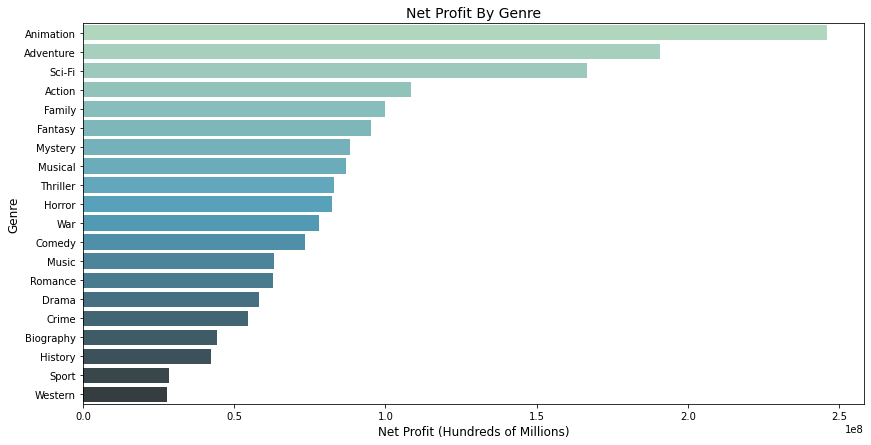

In [29]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=p_by_genre['Adjusted_Profit'], y=p_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Net Profit By Genre', fontsize=14)
plt.savefig('NetProfitGenre');

Interesting, although they are not the most commonly released genres; animation, adventure, and sci-fi typically have the most success in terms of median net profit. We can also see that Animation has a desirable profit margin along with Adventure and Sci-Fi.

Lastly, of what percentage of the total net profit from all genres does each genre account?

In [30]:
#Grouped by genre, find the percent total of the net profit for each.
per_by_genre = genre_budgets_df.groupby(['Genre'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
per_by_genre['Percent Total of Net Profit'] = (per_by_genre['Adjusted_Profit']/per_by_genre['Adjusted_Profit'].sum()*100).round(2)
per_by_genre

,Genre,Adjusted_Profit,Percent Total of Net Profit
1,Adventure,2.564406e+11,18.16
0,Action,2.234153e+11,15.82
4,Comedy,1.798789e+11,12.74
6,Drama,1.697614e+11,12.02
15,Sci-Fi,9.019307e+10,6.39
17,Thriller,7.331890e+10,5.19
2,Animation,7.036169e+10,4.98
14,Romance,6.314436e+10,4.47
5,Crime,5.929665e+10,4.20
8,Fantasy,5.822451e+10,4.12


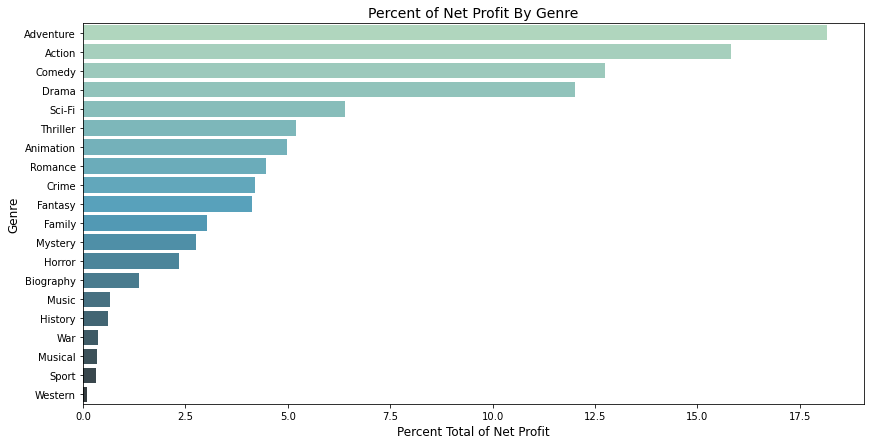

In [31]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=per_by_genre['Percent Total of Net Profit'], y=per_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Percent Total of Net Profit', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Percent of Net Profit By Genre', fontsize=14)
plt.savefig('PercentProfitGenre');

Now we can see that adventure, action, comedy and drama make up the lionshare of the overall net profits from all movies. However, from our recent observations we know there are also major opportunities in the animation and sci-fi markets due to lower saturation but high average net profits. We will soon determine which genres are most successful during which months.

**Question 2 Conclusion**: We recommend that Microsoft should focus their efforts on the top 6 most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. A further recommendation to focus on Sci-Fi and Animation due to less competition and a higher opportunity to profit.

# Question 3: What is the best time of the year to release a movie?


In [32]:
#Convert the Release Date field to type datetime.
imdb_budgets_df['Release Date'] = pd.to_datetime(imdb_budgets_df['Release Date'])

In [33]:
#Add a new column called month, displaying only the month from the release date.
dateData =  [x.strftime('%B') for x in imdb_budgets_df['Release Date']]
imdb_budgets_df['Month'] = dateData

Let's first start by determing which months see the most movie releases.


In [34]:
#Count the total number of movies and group by month.
m_by_month = imdb_budgets_df.groupby(['Month'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
m_by_month

,Month,Movie
2,December,322
10,October,268
9,November,260
1,August,245
11,September,240
5,July,225
7,March,218
6,June,216
3,February,191
0,April,188


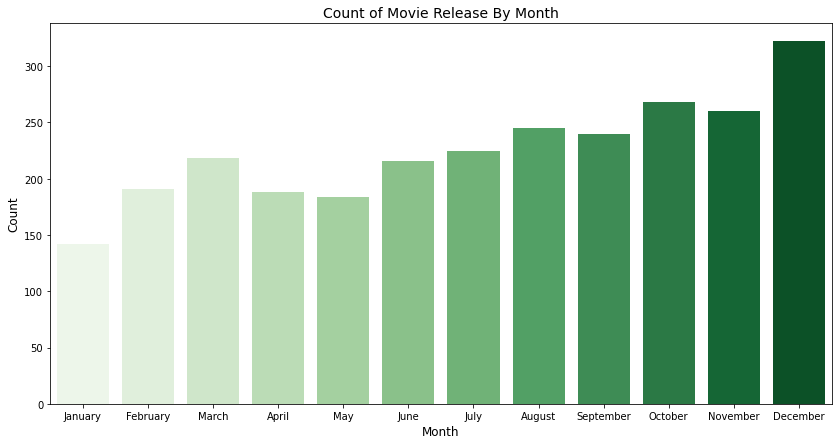

In [35]:
#Plot the above findings in order by month.
plt.figure(figsize=(14,7))
ax7 = sns.countplot(x=imdb_budgets_df['Month'], palette='Greens',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Movie Release By Month', fontsize=14)
plt.savefig('CountbyMonth');

As you can see October and December lead the way in terms of sheer quantity of movies but does this suggest a higher level of profitability? Next we will look into the average net income by movie for each month.

In [36]:
#Once again group the movies by month, showing the average net profit for each.
p_by_month = imdb_budgets_df.groupby('Month', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)
p_by_month

,Month,Adjusted_Profit,Profit_Margin
6,June,2.009694e+08,0.643000
8,May,1.829909e+08,0.643613
5,July,1.421666e+08,0.631211
2,December,1.187350e+08,0.624008
9,November,8.810102e+07,0.607858
7,March,6.967012e+07,0.566592
3,February,6.740670e+07,0.567524
4,January,6.648785e+07,0.582466
10,October,5.875581e+07,0.545005
1,August,5.572410e+07,0.539321


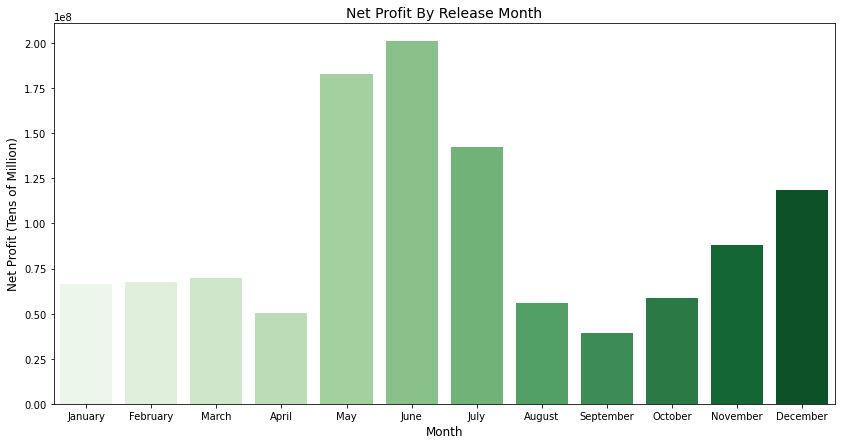

In [37]:
#Plot your above findings in order by month.
plt.figure(figsize=(14,7))
ax8 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Adjusted_Profit'], palette='Greens', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit (Tens of Million)', fontsize=12)
plt.title('Net Profit By Release Month', fontsize=14)
plt.savefig('ProfitbyMonth');

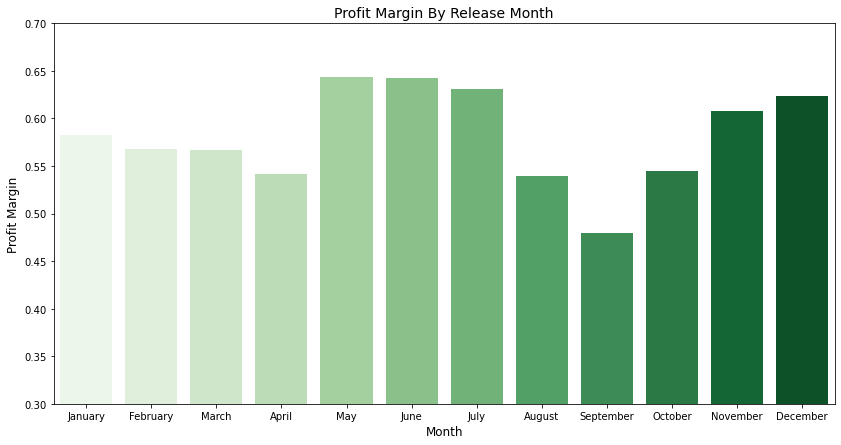

In [38]:
plt.figure(figsize=(14,7))
ax9 = sns.barplot(x=p_by_month['Month'], y=p_by_month['Profit_Margin'], palette='Greens', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin By Release Month', fontsize=14)
plt.ylim(0.3, 0.7)
plt.savefig('MarginByMonth');

Interestingly, May and June shoot to the top in terms of both median net profit and profit margin.

Now as previously mentioned, let's dig a little further and see which genre tends to do the best in which month.


In [39]:
#Convert the Release Date field to type datetime
#Add a new column called month, displaying only the month from the release date.
genre_budgets_df['Release Date'] = pd.to_datetime(genre_budgets_df['Release Date'])
genreDate =  [x.strftime('%B') for x in genre_budgets_df['Release Date']]
genre_budgets_df['Month'] = genreDate

In [40]:
#Create a new table called month_genre consisting of Genre, Month, Net Profit, and Release Date
month_genre = genre_budgets_df[['Genre', 'Month', 'Adjusted_Profit', 'Release Date']]
#Group by Genre and Month, displaying the average Net Profit for each combination.
month_genre = month_genre.groupby(['Genre', 'Month'], as_index=False)['Adjusted_Profit'].mean().sort_values(by='Adjusted_Profit', ascending=False)

In [41]:
#Slice the top six most profitable genres from above.
Adventure_df = month_genre.loc[month_genre['Genre'].str.contains('Adventure')]
Action_df = month_genre.loc[month_genre['Genre'].str.contains('Action')]
Comedy_df = month_genre.loc[month_genre['Genre'].str.contains('Comedy')]
Drama_df = month_genre.loc[month_genre['Genre'].str.contains('Drama')]
Scifi_df = month_genre.loc[month_genre['Genre'].str.contains('Sci-Fi')]
Animation_df = month_genre.loc[month_genre['Genre'].str.contains('Animation')]

In [42]:
#Concatenate the six new tables into one new table.
genre_concat = [Adventure_df, Action_df, Comedy_df, Drama_df, Scifi_df, Animation_df]
month_genre_df = pd.concat(genre_concat)

In [43]:
#Create a table of the months in order.
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#Create a pivot table of month_genre_df, use the month_in_order table to reindex the pivot table.
month_genre_pivoted = month_genre_df.pivot(index='Month', columns='Genre', values='Adjusted_Profit').reindex(months_in_order)

In [44]:
month_genre_pivoted

Genre,Action,Adventure,Animation,Comedy,Drama,Sci-Fi
Month,,,,,,
January,7.413710e+07,1.476945e+08,2.861619e+08,1.081142e+08,8.510980e+07,4.847841e+07
February,1.325225e+08,1.721440e+08,2.890312e+08,1.172907e+08,1.169639e+08,1.679075e+08
March,1.617265e+08,3.043662e+08,3.449787e+08,1.475210e+08,8.100679e+07,2.380246e+08
April,3.081948e+08,4.077304e+08,5.790575e+07,7.341174e+07,1.121110e+08,5.821588e+08
May,4.603421e+08,5.361017e+08,7.792222e+08,2.646874e+08,1.719301e+08,5.887277e+08
June,3.942143e+08,6.231777e+08,7.343236e+08,2.792219e+08,2.249720e+08,6.805999e+08
July,3.551531e+08,3.671400e+08,3.882013e+08,2.201460e+08,2.570563e+08,4.118579e+08
August,1.262433e+08,1.187835e+08,4.116103e+07,9.389713e+07,1.081195e+08,1.251796e+08
September,8.335916e+07,1.508858e+08,2.066637e+08,9.824904e+07,7.691201e+07,1.965906e+08


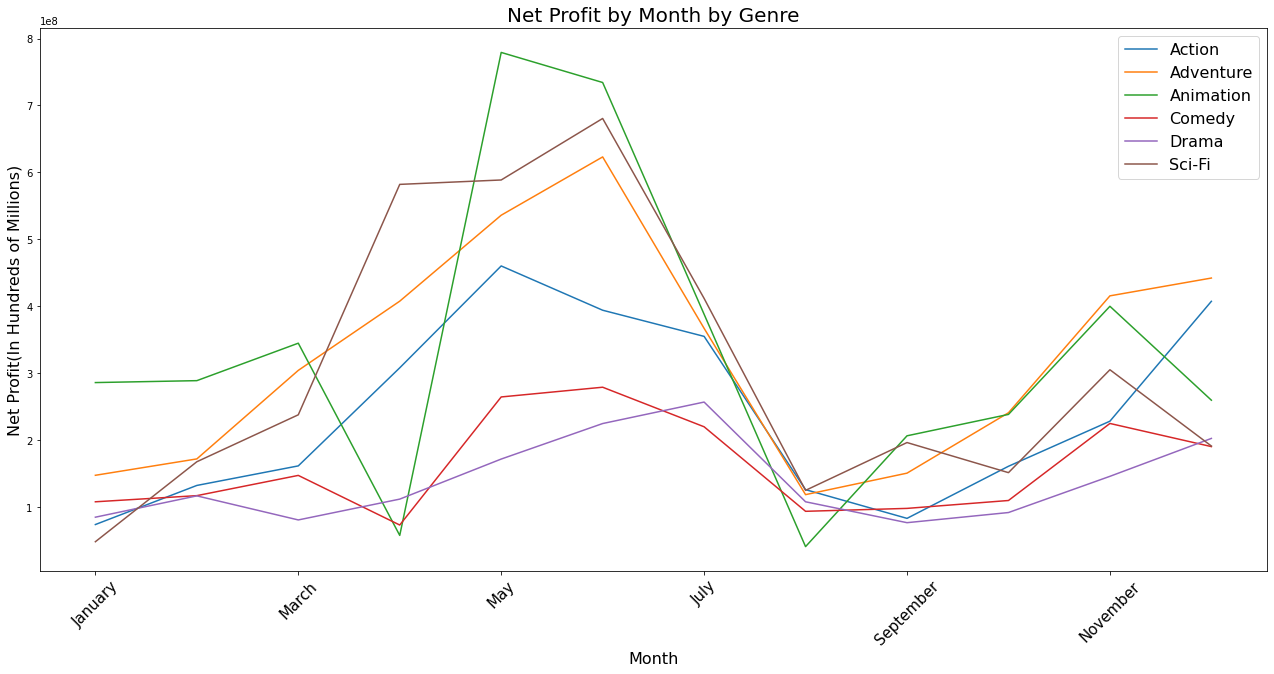

In [45]:
#Visualize the top 6 most profitable genre's by month
ax10 = month_genre_pivoted.plot(kind='line', figsize=(22, 10), rot=0)
plt.legend(prop={'size': 16})
plt.xlabel('Month', fontsize=16)
plt.ylabel('Net Profit(In Hundreds of Millions)', fontsize=16)
plt.title('Net Profit by Month by Genre', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyMonthbyGenre');

We can see that each genre follows the same basic pattern, with the May and July months proving to be the most profitable time to release a movie. Some further analysis shows that releasing an animation movie in particular during the May and July months will have the greatest potential for high net profits. On the other hand drama, although fluctuates slightly with the months, tends to have no impact based on release date. When considering what aspects go into creating a successful movie, it's clear that one must take take into account the impact of a well timed release date.

**Question 3 Conclusion**: We recommend that Microsoft release the bulk of their movies, especially Drama, during the May and July months. Adventure, Sci-fi and Comedy movies would see similar success if released in those months ,the recommendation remains to focus on March to July.

# Question 4: What impact, if any, does runtime and movie rating have on Net Profit, Profit Margin and IMDb rating?


Let's first start by analyzing the ratings. We want to include only movies rated G, PG, PG-13 or R.


In [46]:
rating_counts = imdb_budgets_df['Rating'].value_counts()
rating_list = rating_counts[rating_counts >= 10].index.tolist()
rating_df = imdb_budgets_df[imdb_budgets_df['Rating'].isin(rating_list)]

In [47]:
rating_df = rating_df.reset_index()
rating_df

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit,Month
0,0,Avengers: Endgame,2019,8.4,PG-13,181,"[Action, Adventure, Drama]",2019-04-23,400000000,858373000,2.797732e+09,2.397732e+09,0.857027,429200000.0,2.572766e+09,April
1,1,Spider-Man: No Way Home,2021,8.3,PG-13,148,"[Action, Adventure, Fantasy]",2021-12-14,200000000,814108407,1.910042e+09,1.710042e+09,0.895290,185400000.0,1.585209e+09,December
2,2,Avatar,2009,7.8,PG-13,162,"[Action, Adventure, Fantasy]",2009-12-17,237000000,785221649,2.910284e+09,2.673284e+09,0.918565,427311000.0,4.819931e+09,December
3,3,Black Panther,2018,7.3,PG-13,134,"[Action, Adventure, Sci-Fi]",2018-02-13,200000000,700059566,1.336494e+09,1.136494e+09,0.850355,229200000.0,1.302422e+09,February
4,4,Avengers: Infinity War,2018,8.4,PG-13,149,"[Action, Adventure, Sci-Fi]",2018-04-25,300000000,678815482,2.048360e+09,1.748360e+09,0.853541,343800000.0,2.003620e+09,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,2695,Beautiful Boy,2018,7.3,R,120,"[Biography, Drama]",2018-10-12,25000000,7634767,1.331456e+07,-1.168544e+07,-0.877643,28650000.0,-1.339151e+07,October
2693,2696,Mortdecai,2015,5.5,R,107,"[Action, Adventure, Comedy]",2015-01-21,60000000,7696134,3.039613e+07,-2.960387e+07,-0.973935,81900000.0,-4.040928e+07,January
2694,2697,Over Her Dead Body,2008,5.2,PG-13,95,"[Comedy, Fantasy, Romance]",2008-02-01,10000000,7570127,2.159607e+07,1.159607e+07,0.536953,18760000.0,2.175423e+07,February
2695,2698,Proof,2005,6.7,PG-13,100,"[Drama, Mystery]",2005-09-16,20000000,7535331,8.284331e+06,-1.171567e+07,-1.414196,41900000.0,-2.454433e+07,September


In [48]:
#Count the total number of movies and group by month.
rating_count = rating_df.groupby(['Rating'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
rating_count

,Rating,Movie
2,PG-13,1158
3,R,1061
1,PG,451
0,G,27


In [49]:
#Group by Rating let's determine which has the highest median net profit and profit margin.
rating_df2 = rating_df.groupby(['Rating'], as_index=False)[['Adjusted_Profit', 'Profit_Margin', 'IMDb']].median().sort_values(by='Adjusted_Profit', ascending=False)
rating_df2

,Rating,Adjusted_Profit,Profit_Margin,IMDb
0,G,3.352918e+08,0.760594,7.0
1,PG,1.129267e+08,0.602477,6.4
2,PG-13,8.629818e+07,0.576576,6.3
3,R,6.175598e+07,0.581644,6.6


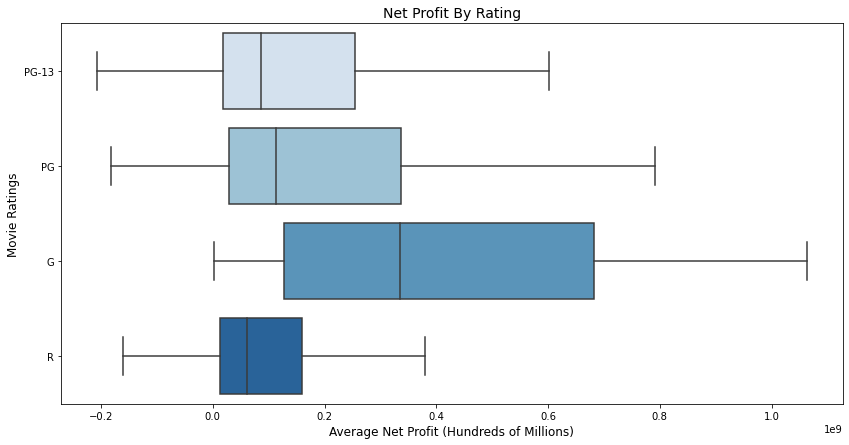

In [50]:
# Plot your above findings
plt.figure(figsize=(14,7))
ax13 = sns.boxplot( y=rating_df["Rating"], x=rating_df["Adjusted_Profit"], showfliers=False, palette='Blues')
plt.xlabel('Average Net Profit (Hundreds of Millions)', fontsize=12)
plt.ylabel('Movie Ratings', fontsize=12)
plt.title('Net Profit By Rating', fontsize=14)
plt.savefig('ProfitbyRating');

As you can see, PG and PG-13 rated movies tend to perform best. It would be interesting to see a breakdown of total net profit by genre by rating to get a better idea of which rating and genres go best together.

In [51]:
# First drop the rating column from genre_budgets_df and genre from rating_df
genre_rating_df = genre_budgets_df.drop(['Rating'], axis=1)
rating_df = rating_df.drop(['Genre'], axis=1)

In [52]:
# Merge the genre_rating_df table and rating_df table
genre_rating_df = pd.merge(genre_rating_df, rating_df)

In [53]:
#Slice the top six most profitable genres.
Adv_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Adventure')]
Act_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Action')]
Com_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Comedy')]
Dra_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Drama')]
Sci_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Sci-Fi')]
Ani_df = genre_rating_df.loc[genre_rating_df['Genre'].str.contains('Animation')]

genre_concat = [Adv_df, Act_df, Com_df, Dra_df, Sci_df, Ani_df]
genre_rating = pd.concat(genre_concat)

In [54]:
# Create a pivot table from genre_rating
gr_df = genre_rating.groupby(['Genre', 'Rating'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
gr_pivoted = gr_df.pivot(index='Genre', columns='Rating', values='Adjusted_Profit')

In [55]:
gr_pivoted

Rating,G,PG,PG-13,R
Genre,,,,
Action,NaN,2.131552e+10,1.578749e+11,4.422488e+10
Adventure,1.127326e+10,9.405422e+10,1.380054e+11,1.310774e+10
Animation,1.114090e+10,5.795995e+10,1.024153e+09,2.366870e+08
Comedy,8.443533e+09,7.404852e+10,5.997192e+10,3.741494e+10
Drama,4.561087e+09,1.911591e+10,8.297052e+10,6.311074e+10
Sci-Fi,1.323645e+08,5.319546e+09,7.071366e+10,1.402750e+10


In [56]:
# Preview the table.
gr_pivoted

Rating,G,PG,PG-13,R
Genre,,,,
Action,NaN,2.131552e+10,1.578749e+11,4.422488e+10
Adventure,1.127326e+10,9.405422e+10,1.380054e+11,1.310774e+10
Animation,1.114090e+10,5.795995e+10,1.024153e+09,2.366870e+08
Comedy,8.443533e+09,7.404852e+10,5.997192e+10,3.741494e+10
Drama,4.561087e+09,1.911591e+10,8.297052e+10,6.311074e+10
Sci-Fi,1.323645e+08,5.319546e+09,7.071366e+10,1.402750e+10


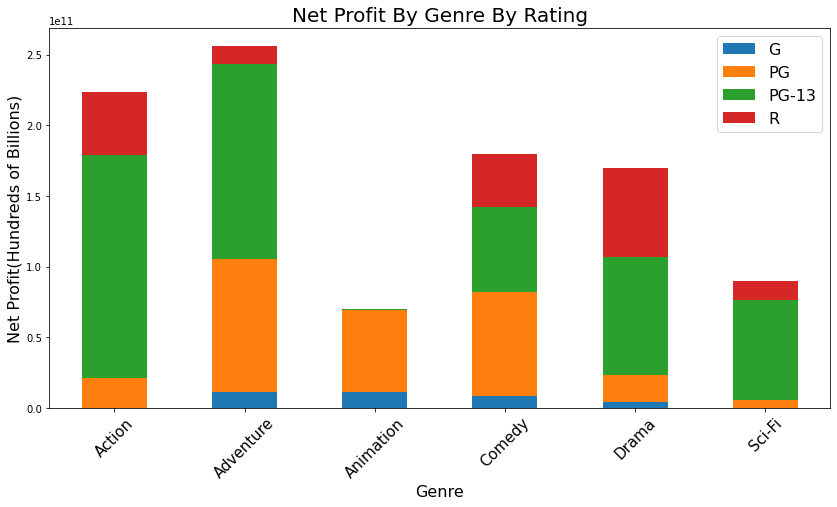

In [57]:
# Plot the above findings.
ax14 = gr_pivoted.plot(kind='bar', stacked=True, figsize=(14,7))
plt.legend(prop={'size': 16})
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Net Profit(Hundreds of Billions)', fontsize=16)
plt.title('Net Profit By Genre By Rating', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyGenrebyRating');

Now let's shift our focus to the film's runtime. Does movie length have an impact in terms of success?

In [58]:
# Create a new table with runtime, net profit and profit margin.
runtime_df = imdb_budgets_df[['Runtime', 'Adjusted_Profit', 'Profit_Margin']]
runtime_df

,Runtime,Adjusted_Profit,Profit_Margin
0,181,2.572766e+09,0.857027
1,148,1.585209e+09,0.895290
2,162,4.819931e+09,0.918565
3,134,1.302422e+09,0.850355
4,149,2.003620e+09,0.853541
...,...,...,...
2695,120,-1.339151e+07,-0.877643
2696,107,-4.040928e+07,-0.973935
2697,95,2.175423e+07,0.536953
2698,100,-2.454433e+07,-1.414196


In [59]:
# Let's start by taking a look at the correlation between runtime and net profit/profit margin.
pearsoncorr = runtime_df.corr(method='pearson')
pearsoncorr

,Runtime,Adjusted_Profit,Profit_Margin
Runtime,1.00000,0.251480,0.005770
Adjusted_Profit,0.25148,1.000000,0.386617
Profit_Margin,0.00577,0.386617,1.000000


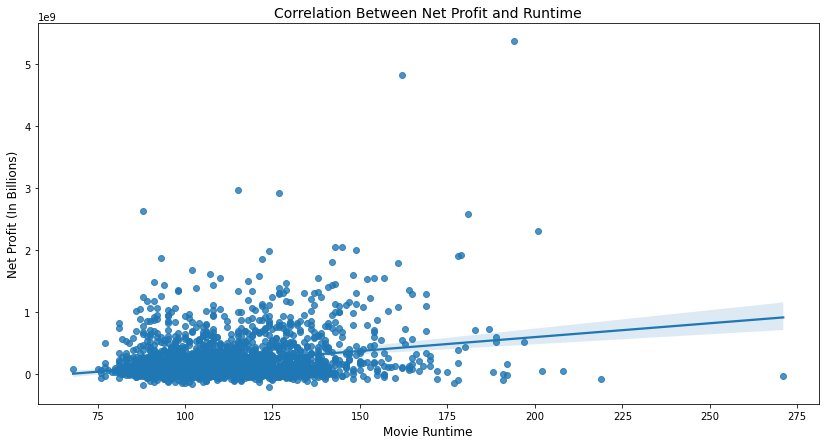

In [60]:
# Plot the correlation.
plt.figure(figsize=(14,7))
ax15 = sns.regplot(x='Runtime', y='Adjusted_Profit', data=imdb_budgets_df)
plt.xlabel('Movie Runtime', fontsize=12)
plt.ylabel('Net Profit (In Billions)', fontsize=12)
plt.title('Correlation Between Net Profit and Runtime', fontsize=14)
plt.savefig('CorrProfitRuntime');

Although there is a small positive correlation of 0.386617 showing that the long the runtime the higher the net profit, it's incredibly minute. With that in mind, we can take from this that, typically, it is not important to keep a movie above or below a cetain time threshold.

**Question 4 Conclusion**: We recommend that Microsoft take into consideration the rating of the movie based on the genre and target audience. If making animation movies, it is wise to stick to a G or PG rating, otherwise PG-13 is the sweetspot. In terms of runtime, there is little correlation in terms of overall profitability.